Type ctrl+F9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
st=pd.read_csv("https://raw.githubusercontent.com/dudegladiator/Testing/main/MSFT%20_weekly_dataset%20(1).csv")

In [ ]:
st.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,46.660000,47.419998,45.490002,46.230000,40.248043,133149800
1,2015-01-08,46.750000,47.910000,45.619999,45.959999,40.012993,142231500
2,2015-01-15,46.220001,46.650002,45.169998,45.919998,39.978149,143689100
3,2015-01-22,46.380001,47.389999,41.160000,41.189999,35.860191,358306200
4,2015-01-29,40.930000,42.209999,40.230000,41.840000,36.426086,285639900


In [ ]:
st=st.drop(labels=["Date","Open","High","Low","Close"],axis=1)

# **Correlation Coefficient**

In [ ]:
st["Adj Close"].corr(st["Volume"])

-0.05047909117206479

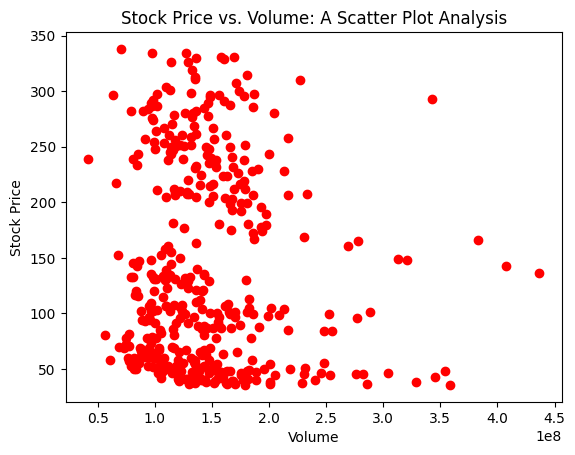

In [ ]:
plt.scatter(st["Volume"], st["Adj Close"],color='r')
plt.title("Stock Price vs. Volume: A Scatter Plot Analysis")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig('Correlation Coefficeint') #To download this plot

# **Regression analysis**

### Manually

In [ ]:
Y=st[["Adj Close"]].copy()
X=st[["Volume"]].copy()

In [ ]:
X["intercept"]=1
X=X[["Volume","intercept"]]

In [ ]:
X_T=X.T
B=np.linalg.inv(X_T @ X) @ X_T @ Y

In [ ]:
B

,Adj Close
0,6.071571e-09
1,1.377671e+02


### With the help of  Function

In [ ]:
x=st[["Volume"]].copy()

In [ ]:
y=st[["Adj Close"]].copy()

In [ ]:
regressor=LinearRegression()
result1=regressor.fit(x,y)

In [ ]:
y_predict1=result1.predict(x)

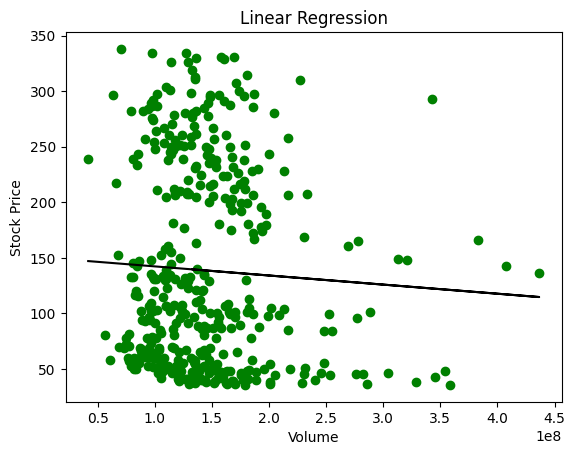

In [ ]:
plt.scatter(x,y,color='g')
plt.plot(x,y_predict1,color='k')
plt.title("Linear Regression")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig("Linear Regression")

# **Outliers**

### Drawing Leverage Plot

In [ ]:
model = sm.OLS(y, sm.add_constant(x)).fit()

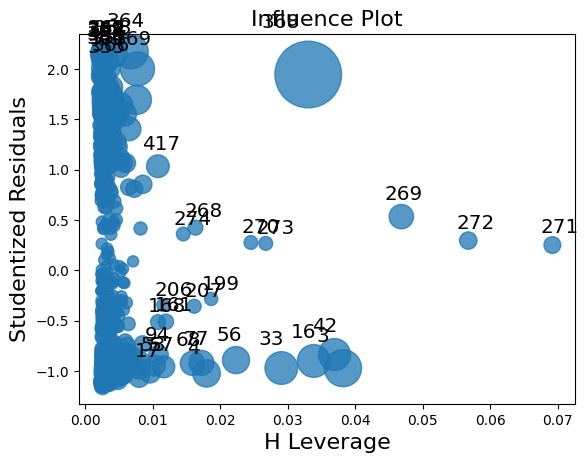

In [ ]:
sm.graphics.influence_plot(model)
plt.savefig("Leverage plots")

### Removing outliers

In [ ]:
stand_resids = model.resid_pearson

In [ ]:
newst=st

newst=pd.concat([newst,pd.DataFrame(stand_resids)],axis=1)
newst=newst.rename(columns={0:"stand_resids"})

In [ ]:
newst

,Adj Close,Volume,stand_resids
0,40.248043,133149800,-1.108453
1,40.012993,142231500,-1.102778
2,39.978149,143689100,-1.101835
3,35.860191,358306200,-0.951704
4,36.426086,285639900,-1.011778
...,...,...,...
413,243.759445,113950500,1.144412
414,256.577362,151494400,1.321710
415,243.819290,200200200,1.223876
416,233.944031,84004400,1.007551


In [ ]:
newst.to_csv("WithOutliers.csv")

In [ ]:
newst.drop(newst[(newst['stand_resids'] >= 1.90) | (newst['stand_resids'] <= -1.90) ].index, inplace = True)

In [ ]:
newst

,Adj Close,Volume,stand_resids
0,40.248043,133149800,-1.108453
1,40.012993,142231500,-1.102778
2,39.978149,143689100,-1.101835
3,35.860191,358306200,-0.951704
4,36.426086,285639900,-1.011778
...,...,...,...
413,243.759445,113950500,1.144412
414,256.577362,151494400,1.321710
415,243.819290,200200200,1.223876
416,233.944031,84004400,1.007551


In [ ]:
newst.to_csv("RemovedOutliers.csv")

### Making the data ready

In [ ]:
newx=newst[["Volume"]].copy()

In [ ]:
newy=newst[["Adj Close"]].copy()

### New Leverage Plot

In [ ]:
newmodel = sm.OLS(newy, sm.add_constant(newx)).fit()

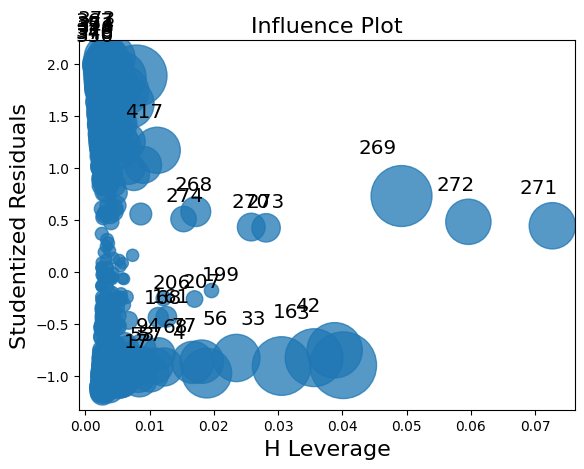

In [ ]:
sm.graphics.influence_plot(newmodel)
plt.savefig("After Removing Leverage PLot")

### New Correlation Coefficient

In [ ]:
newst["Adj Close"].corr(newst["Volume"])

-0.06931532821659186

###**Linear** Regression

In [ ]:
result2 = regressor.fit(newx,newy)

In [ ]:
result2.coef_

array([[-1.05074879e-07]])

In [ ]:
result2.intercept_

array([146.53950993])

In [ ]:
ypredict2=result2.predict(newx)

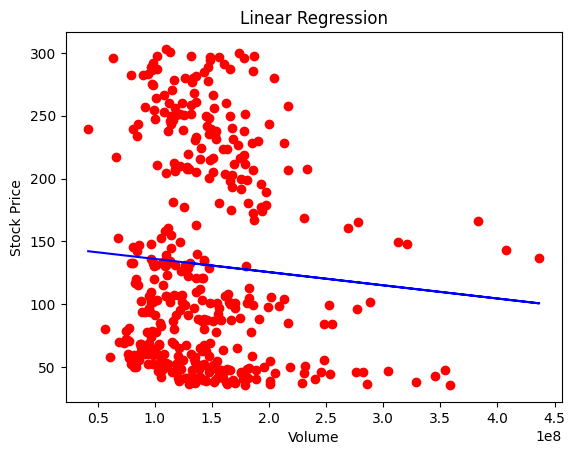

In [ ]:
plt.scatter(newx,newy,color='r')
plt.plot(newx,ypredict2,color='b')
plt.title("Linear Regression")
plt.xlabel("Volume")
plt.ylabel("Stock Price")
plt.savefig("New Linear Regression")


                                                             ***Thank You***
